In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import seaborn as sns

import pickle

import warnings
warnings.filterwarnings('ignore')

In [3]:
test_file = pd.read_csv(r'https://raw.githubusercontent.com/training-ml/Task/main/Test_Sales_LinReg.csv')

In [6]:
test_file.head(10)

,Republic,NDTV,TV5,TV9,AajTak,sales
0,8.7,48.9,4.0,75.0,49.00,7.2
1,57.5,32.8,65.9,23.5,57.50,11.8
2,120.2,19.6,7.2,11.6,18.50,13.2
3,8.6,2.1,46.0,1.0,2.60,4.8
4,199.8,2.6,52.9,21.2,2.90,10.6
5,66.1,5.8,114.0,24.2,9.80,8.6
6,214.7,24.0,55.8,4.0,26.00,17.4
7,23.8,35.1,18.3,65.9,35.19,9.2
8,97.5,7.6,19.1,7.2,7.90,9.7
9,204.1,32.9,53.4,46.0,42.90,19.0


In [7]:
test_file.shape

(305, 6)

In [8]:
test_file.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,295.000000,300.000000,305.000000,297.000000,300.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,87.330161,14.781927,20.290023,21.411180,15.853789,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,74.050000,9.125000,15.900000,10.900000,10.000000,10.300000
50%,149.800000,21.050000,26.200000,23.500000,21.300000,12.800000
75%,221.450000,35.650000,39.600000,43.000000,36.900000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


In [20]:
test_file['Republic'] = test_file['Republic'].fillna(test_file['Republic'].mean())
test_file['NDTV'] = test_file['NDTV'].fillna(test_file['NDTV'].mean())
test_file['TV9'] = test_file['TV9'].fillna(test_file['TV9'].mean())
test_file['AajTak'] = test_file['AajTak'].fillna(test_file['AajTak'].mean())


In [21]:
test_file.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,85.881799,14.659861,20.290023,21.127576,15.722872,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,75.100000,9.300000,15.900000,11.000000,10.100000,10.300000
50%,148.136610,21.300000,26.200000,24.200000,21.700000,12.800000
75%,220.300000,35.600000,39.600000,41.800000,36.800000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


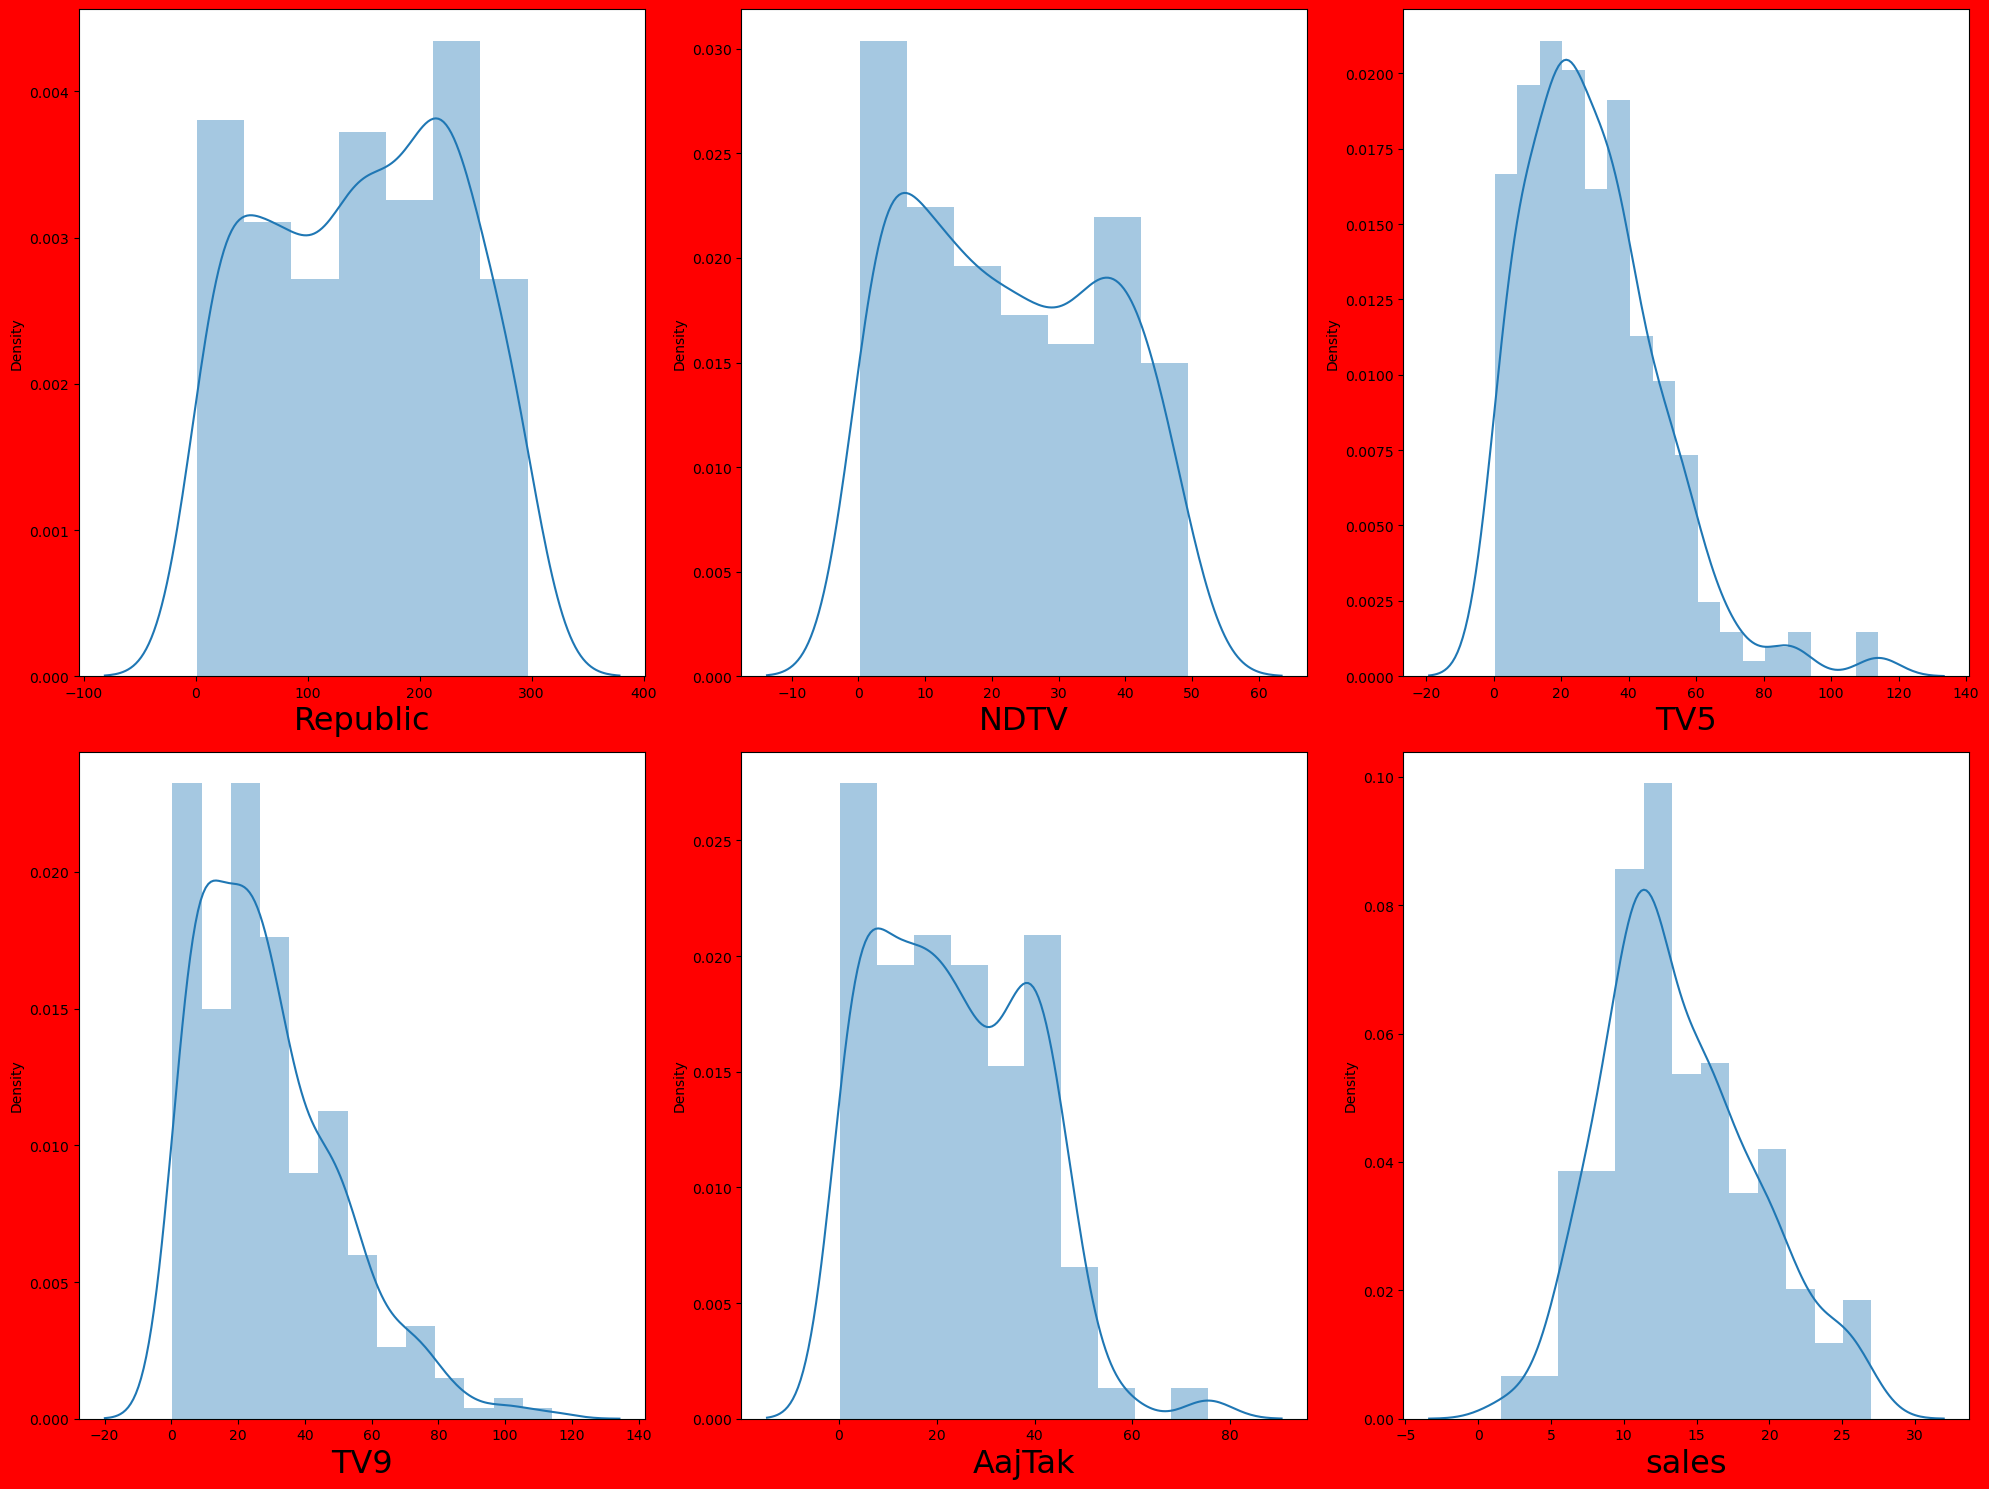

In [25]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in test_file:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(test_file[column])
        plt.xlabel(column,fontsize=23)
    plotnumber+=1
plt.tight_layout()

In [26]:
y = test_file['sales']
x = test_file.drop(columns = ['sales'])

In [27]:
y

0       7.2
1      11.8
2      13.2
3       4.8
4      10.6
       ... 
300    15.9
301     6.7
302    10.8
303     9.9
304     5.9
Name: sales, Length: 305, dtype: float64

In [28]:
x

,Republic,NDTV,TV5,TV9,AajTak
0,8.7,48.9,4.0,75.0,49.0
1,57.5,32.8,65.9,23.5,57.5
2,120.2,19.6,7.2,11.6,18.5
3,8.6,2.1,46.0,1.0,2.6
4,199.8,2.6,52.9,21.2,2.9
...,...,...,...,...,...
300,286.0,13.9,35.2,3.7,13.9
301,18.7,12.1,23.7,23.4,18.7
302,39.5,41.1,17.6,5.8,39.5
303,75.5,10.8,8.3,6.0,75.5


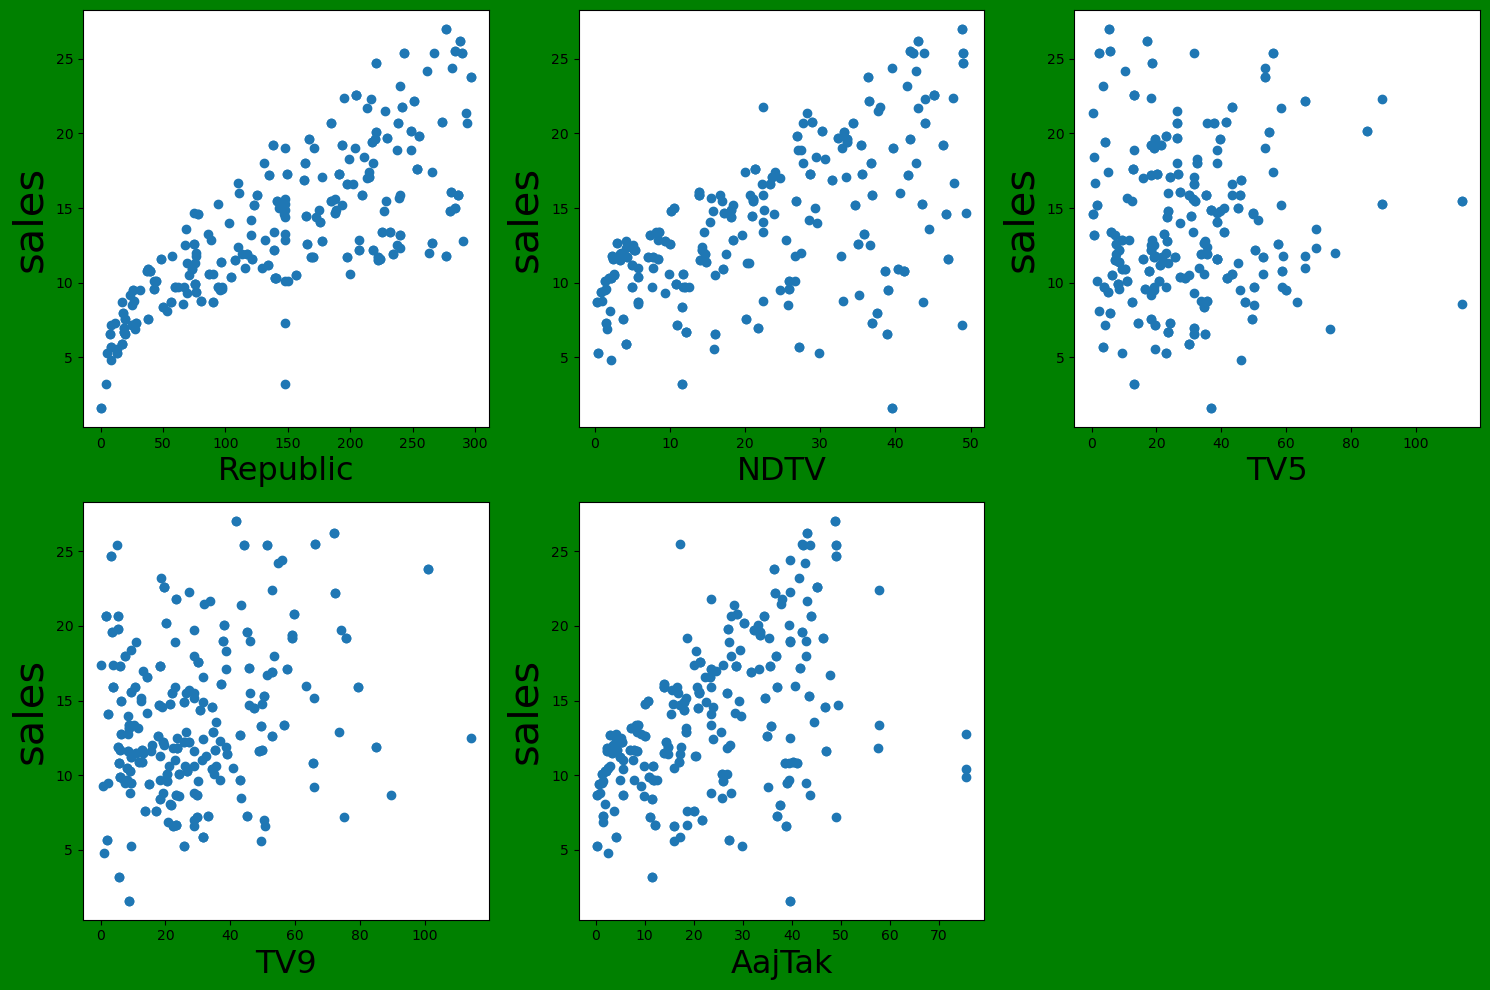

In [30]:
plt.figure(figsize=(15,10), facecolor='green')
plotnumber = 1

for column in x:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=23)
        plt.ylabel('sales',fontsize=30)
    plotnumber+=1
plt.tight_layout()

In [43]:
x = x.drop(columns = ['TV5'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [44]:
X_scaled

array([[-1.62625562,  1.81463603,  2.18734018,  1.62336179],
       [-1.05709897,  0.71459436, -0.25423831,  2.16486391],
       [-0.32582597, -0.18730316, -0.81840887, -0.31967525],
       ...,
       [-1.2670338 ,  1.28169659, -1.09338276,  1.01815353],
       [-0.84716414, -0.78856818, -1.0839009 ,  3.3115743 ],
       [-1.52711973, -1.24634949,  0.12977695, -0.40249322]])

In [42]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [45]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state = 5)
y_train.head()

198    14.8
269    11.7
259    18.0
234     9.6
294    25.5
Name: sales, dtype: float64

In [47]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()